In [ ]:
import os
import numpy as np
import cv2  
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import GlobalAveragePooling2D


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
for i in range(len(model.layers)):
    # Check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # Get filter weights
    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

In [ ]:
# Retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [ ]:
# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

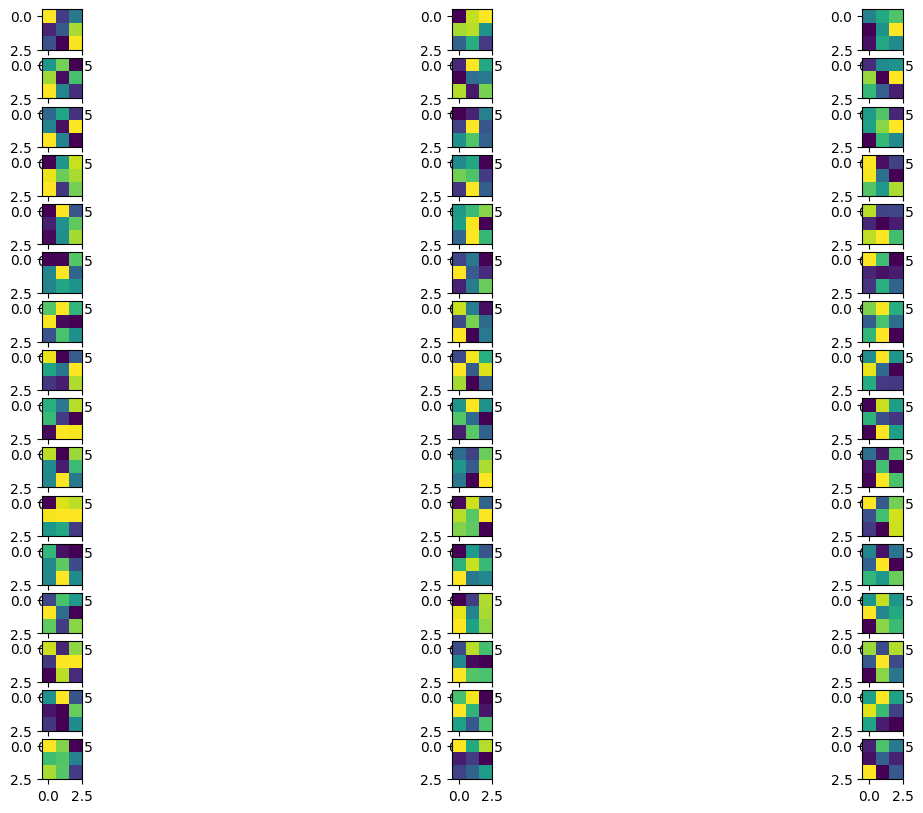

In [ ]:
n_filters =16
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j])
        ix+=1
plt.show()

In [ ]:
model = Model(inputs=model.inputs , outputs=model.layers[2].output)

In [ ]:
# Image folders

image_folder = './Data_files/Augmented_ds/easy'
# image_folder = './Data_files/Augmented_ds/mid'
# image_folder = './Data_files/Augmented_ds/hard'

# Initialize the global average pooling layer
global_avg_pool = GlobalAveragePooling2D()

pooled_outputs = []

for root, dirs, files in os.walk(image_folder):
    for file in files:
        img_path = os.path.join(root, file)
        try:
            # Load image and preprocess
            image = load_img(img_path, target_size=(256, 256))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)
            image = image / 255.0

            # Get feature map from the model
            feature_map = model.predict(image)

            # Apply global average pooling
            pooled_output = global_avg_pool(feature_map).numpy().flatten()
            pooled_outputs.append(pooled_output)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Convert pooled outputs to numpy array and save
pooled_outputs_matrix = np.array(pooled_outputs)
np.savetxt('./Feature_data/easy.csv', pooled_outputs_matrix, delimiter=',')
# np.savetxt('./Feature_data/mid.csv', pooled_outputs_matrix, delimiter=',')
# np.savetxt('./Feature_data/hard.csv', pooled_outputs_matrix, delimiter=',')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━